In [7]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data.loader import load_prices, compute_returns
from src.optimization.markowitz import minimize_volatility

In [8]:
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA", "WEGE3.SA", "B3SA3.SA", "MGLU3.SA", "GGBR4.SA"]
prices = load_prices(tickers, '2020-01-01', '2023-01-01')
returns_df = compute_returns(prices)

target_return = 0.001

/workspaces/deep_learning_finance/src/data/loader.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  10 of 10 completed


In [9]:
returns = compute_returns(prices)

mean_returns = returns.mean()
cov_matrix = returns.cov()

mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()


weights = minimize_volatility(mean_returns, cov_matrix, target_return)

if weights is not None:
    print("Pesos ótimos:", weights)
else:
    print("Otimização falhou. Tente um target_return menor ou verifique os dados.")

Pesos ótimos: [2.65740397e-01 1.89735380e-19 2.16840434e-18 0.00000000e+00
 3.56431464e-18 5.21492773e-02 0.00000000e+00 8.89045781e-18
 3.63593307e-01 3.18517018e-01]


In [10]:
type(mean_returns)

pandas.core.series.Series

### Chart plot - Markowitz

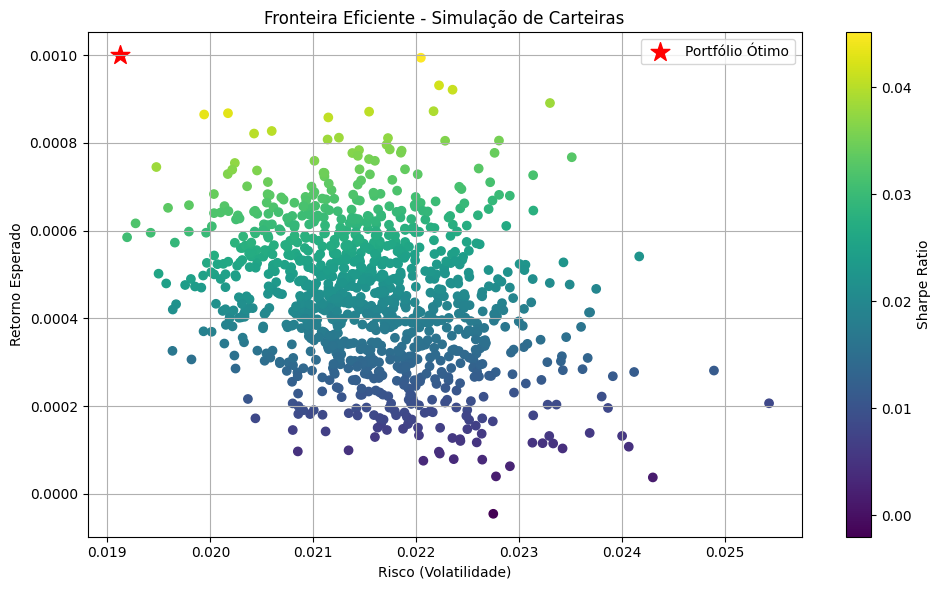

In [11]:
from outputs.charts.markowitz_plot import plot_efficient_frontier

plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights=weights)


In [ ]:
from outputs.charts.markowitz_plot import plot_time_serie

#formato de return errado. em ponto para fixar
# Após calcular returns, cov_matrix e weights...
plot_time_serie(mean_returns, optimized_weights=weights)


ValueError: returns deve ser um DataFrame